<a href="https://colab.research.google.com/github/abhiraman/ML_Algos/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [43]:
%cd /gdrive/MyDrive/DS_Tasks/Titanic Dataset

/gdrive/MyDrive/DS_Tasks/Titanic Dataset


In [44]:
!ls

gender_submission.csv  test.csv  titanic.zip  train.csv


In [45]:
#!unzip titanic.zip

In [90]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [120]:
train_df = pd.read_csv(r"train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Inference on Survival 
1.   Class 1 had maximum survival rate (Pclass)
2.   Survival of female was more than male (Sex)
3.   Greater the sibling/spouse lesser the person surviving (Sibsp)
4.   No Parents/Children greater the person surviving (Parch)




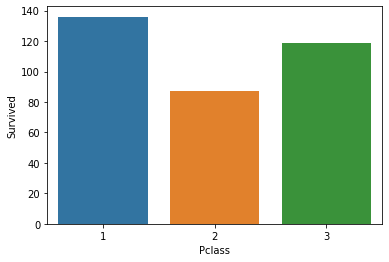

In [92]:
## Identify the features effecting the survival class
def plot_feature(df,groupby):
  new_df = pd.DataFrame.groupby(df,by=groupby).sum()
  iter = new_df.iterrows()
  ll = []
  for erow in iter:ll.append(erow[0])
  new_df[groupby] = ll
  sns.barplot(x=new_df[groupby],y=new_df['Survived'])

plot_feature(train_df,'Pclass')

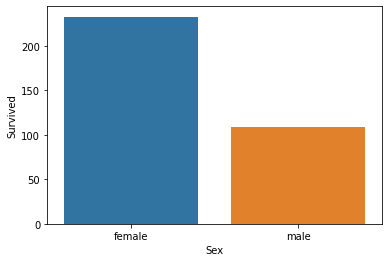

In [93]:
plot_feature(train_df,'Sex')

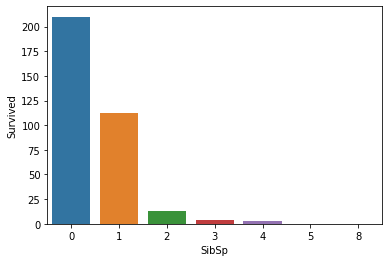

In [94]:

plot_feature(train_df,'SibSp')

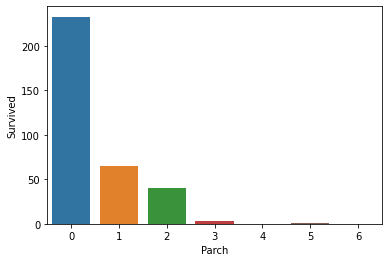

In [95]:

plot_feature(train_df,'Parch')

In [96]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
## Removing Features from the dataset which dont contribute to the survival prediction

all_features = list(train_df.columns)
req_features = ['Pclass','Sex','SibSp','Parch','Age','Survived']
dropped_features = list(set(all_features).difference(req_features))
print("Features not considered:",dropped_features)

Features not considered: ['Cabin', 'Ticket', 'Embarked', 'PassengerId', 'Fare', 'Name']


In [122]:
new_train_df = train_df.drop(dropped_features,axis=1)


In [123]:
new_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [124]:
survival = new_train_df['Survived']
new_train_df = new_train_df.drop('Survived',axis=1)



,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


In [127]:
new_train_df['Sex'].replace(['male','female'],
                        [0, 1], inplace=True)
new_train_df.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [128]:
x_train,x_test,y_train,y_test = train_test_split(new_train_df,survival,test_size=.2,random_state=10)

In [116]:
## Train the classifer Model
model =  sklearn.linear_model.LogisticRegression()

In [135]:
x_train.isna().count

<bound method DataFrame.count of      Pclass    Sex    Age  SibSp  Parch
57    False  False  False  False  False
717   False  False  False  False  False
431   False  False   True  False  False
633   False  False   True  False  False
163   False  False  False  False  False
..      ...    ...    ...    ...    ...
369   False  False  False  False  False
320   False  False  False  False  False
527   False  False   True  False  False
125   False  False  False  False  False
265   False  False  False  False  False

[712 rows x 5 columns]>

In [129]:
estimator = model.fit(x_train,y_train)

ValueError: ignored